# Solar Panel - Regression

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

In [5]:
Data=pd.read_csv("solarpowergeneration.csv")
Data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [6]:
Data.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [7]:
Data.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [9]:
Data.shape

(2920, 10)

In [9]:
Data.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [10]:
Data.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [ ]:
# Missing Values

<Axes: >

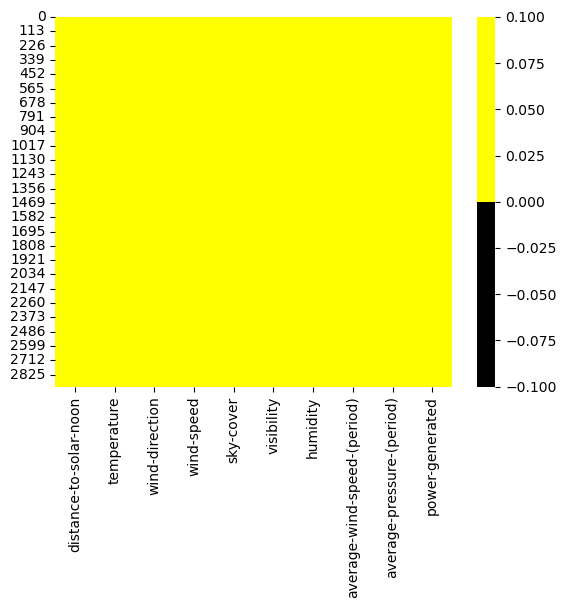

In [15]:
cols = Data.columns 
colours = ['black', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(Data[cols].isnull(),
            cmap=sns.color_palette(colours), cbar = True)

In [11]:
Data.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
# Imputation of missing value with median
median=Data['average-wind-speed-(period)'].median()
print(median)

9.0


In [13]:
Data['average-wind-speed-(period)']=Data['average-wind-speed-(period)'].fillna(median)
Data

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2920 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [ ]:
# Histograms

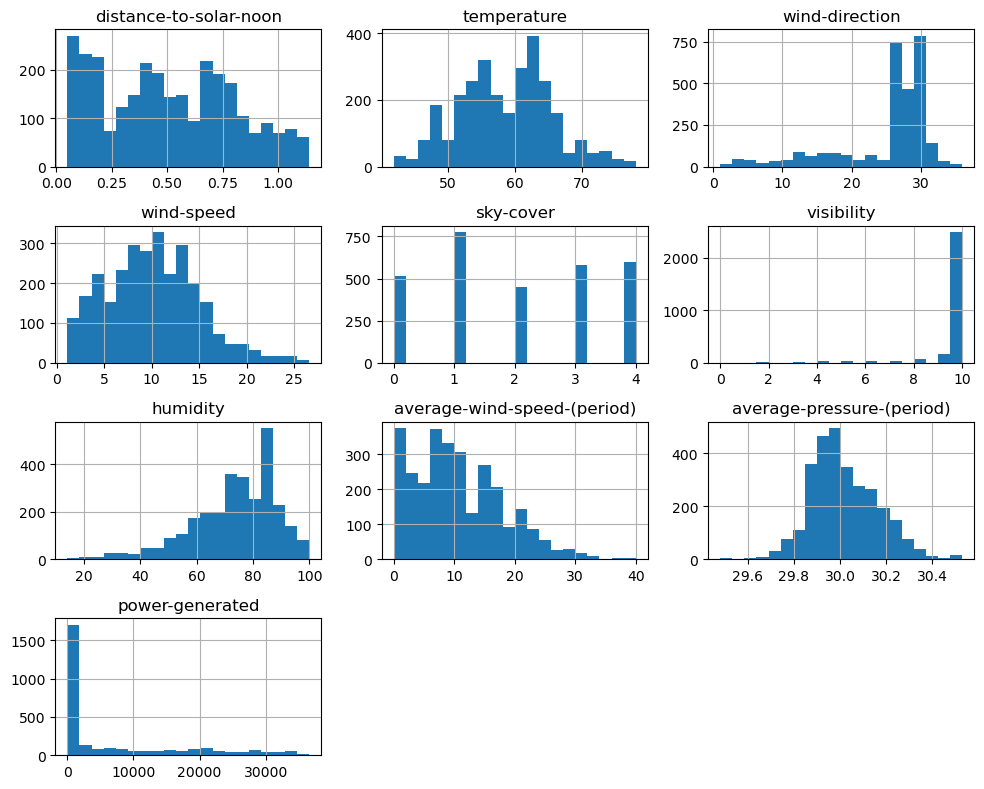

In [19]:
Data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


In [22]:
skewness_values = Data.skew(skipna=True)  # Skip NaN values
print(skewness_values)

distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623168
average-pressure-(period)      0.441384
power-generated                1.307035
dtype: float64


In [ ]:
# Boxplot

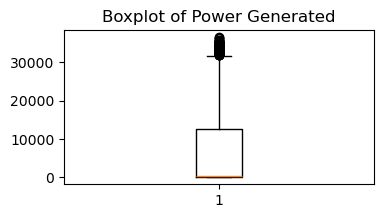

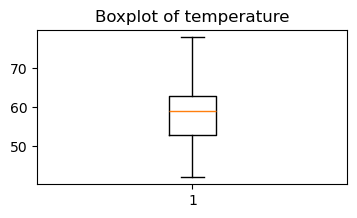

In [37]:
plt.figure(figsize=(4,2))
plt.boxplot(Data["power-generated"])
plt.title('Boxplot of Power Generated')
plt.show()


plt.figure(figsize=(4,2))
plt.boxplot(Data["temperature"])
plt.title('Boxplot of temperature')
plt.show()


In [ ]:
# Outliers

In [60]:
Q1 = Data['power-generated'].quantile(0.25)
Q3 = Data['power-generated'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Data[(Data['power-generated'] < lower_bound) | (Data['power-generated'] > upper_bound)]['power-generated']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")


 - Lower bound: -19085.25
 - Upper bound: 31808.75
 - Number of outliers: 107
 - Outliers: [31911 32890 32187 31880 32324 33387 32254 31885 32377 33390 33045 32471
 33463 34212 33706 32087 33510 33567 36580 35251 34751 32802 33175 33296
 35778 34976 34173 35553 36400 34289 34480 33944 34329 33627 34252 34324
 32864 33434 32018 34177 35282 35743 35635 34780 33746 34371 33753 34140
 33393 35474 34710 36368 33064 32263 35153 33454 32083 34592 33697 33111
 35033 33481 32483 32832 34434 34320 35405 34373 34647 34902 35486 33563
 34620 32108 33909 32729 32195 34591 33639 32608 34224 32484 34718 32812
 34957 34682 33470 34459 33306 32389 34021 34447 34325 33187 34055 33210
 31908 32295 32235 33293 32413 33053 32668 34720 32841 32513 32524]



In [61]:
Q1 = Data['temperature'].quantile(0.25)
Q3 = Data['temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Data[(Data['temperature'] < lower_bound) | (Data['temperature'] > upper_bound)]['temperature']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")


 - Lower bound: 38.0
 - Upper bound: 78.0
 - Number of outliers: 0
 - Outliers: []



In [62]:
Q1 = Data['wind-speed'].quantile(0.25)
Q3 = Data['wind-speed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Data[(Data['wind-speed'] < lower_bound) | (Data['wind-speed'] > upper_bound)]['wind-speed']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")


 - Lower bound: -3.1500000000000004
 - Upper bound: 22.85
 - Number of outliers: 40
 - Outliers: [25.1 25.1 25.1 25.1 25.1 25.1 25.1 25.1 26.6 26.6 26.6 26.6 26.6 26.6
 26.6 26.6 24.4 24.4 24.4 24.4 24.4 24.4 24.4 24.4 23.5 23.5 23.5 23.5
 23.5 23.5 23.5 23.5 23.3 23.3 23.3 23.3 23.3 23.3 23.3 23.3]



In [63]:
Q1 = Data['sky-cover'].quantile(0.25)
Q3 = Data['sky-cover'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Data[(Data['sky-cover'] < lower_bound) | (Data['sky-cover'] > upper_bound)]['sky-cover']

print(f" - Lower bound: {lower_bound}")
print(f" - Upper bound: {upper_bound}")
print(f" - Number of outliers: {outliers.count()}")
print(f" - Outliers: {outliers.values}\n")


 - Lower bound: -2.0
 - Upper bound: 6.0
 - Number of outliers: 0
 - Outliers: []



In [ ]:
# Correlation Matrix

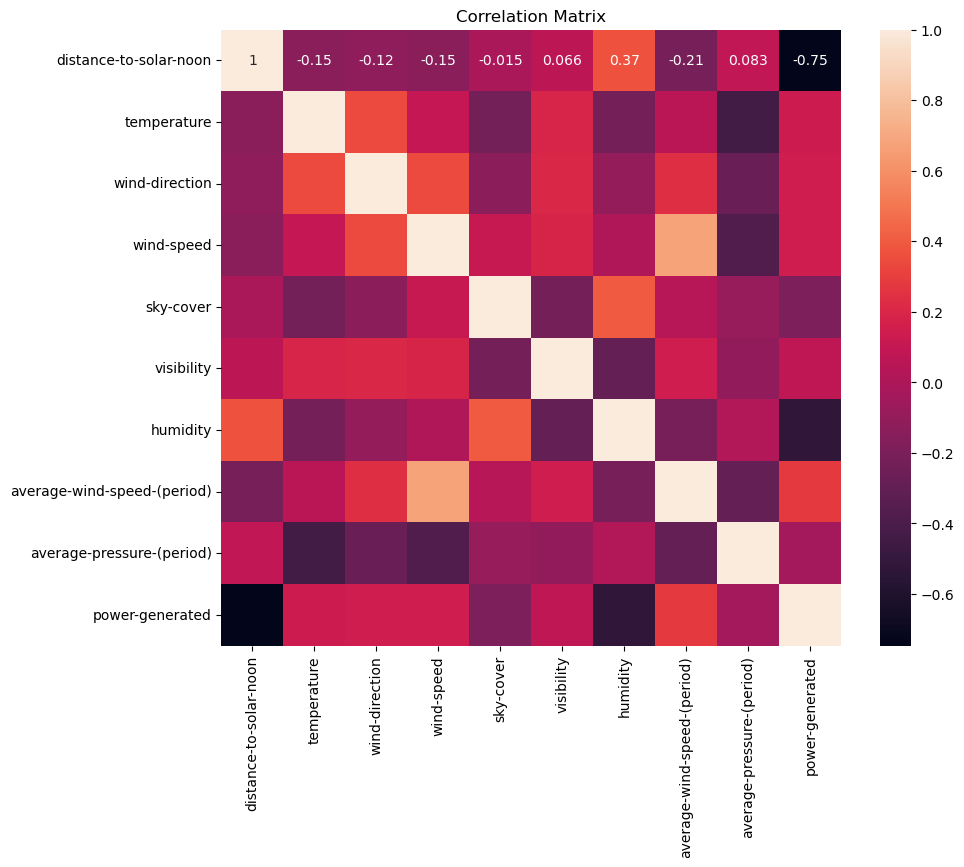

In [117]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Scatter Plot

Text(0, 0.5, 'Power Generated')

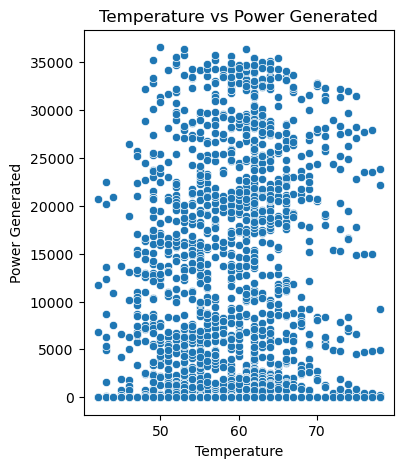

In [53]:
plt.figure(figsize=(4,5))
sns.scatterplot(x='temperature', y='power-generated', data=Data)
plt.title('Temperature vs Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')

Text(0, 0.5, 'Power Generated')

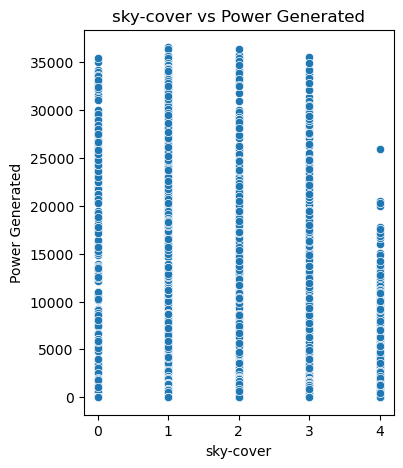

In [54]:
plt.figure(figsize=(4,5))
sns.scatterplot(x='sky-cover', y='power-generated', data=Data)
plt.title('sky-cover vs Power Generated')
plt.xlabel('sky-cover')
plt.ylabel('Power Generated')

In [ ]:
# Pair Plot

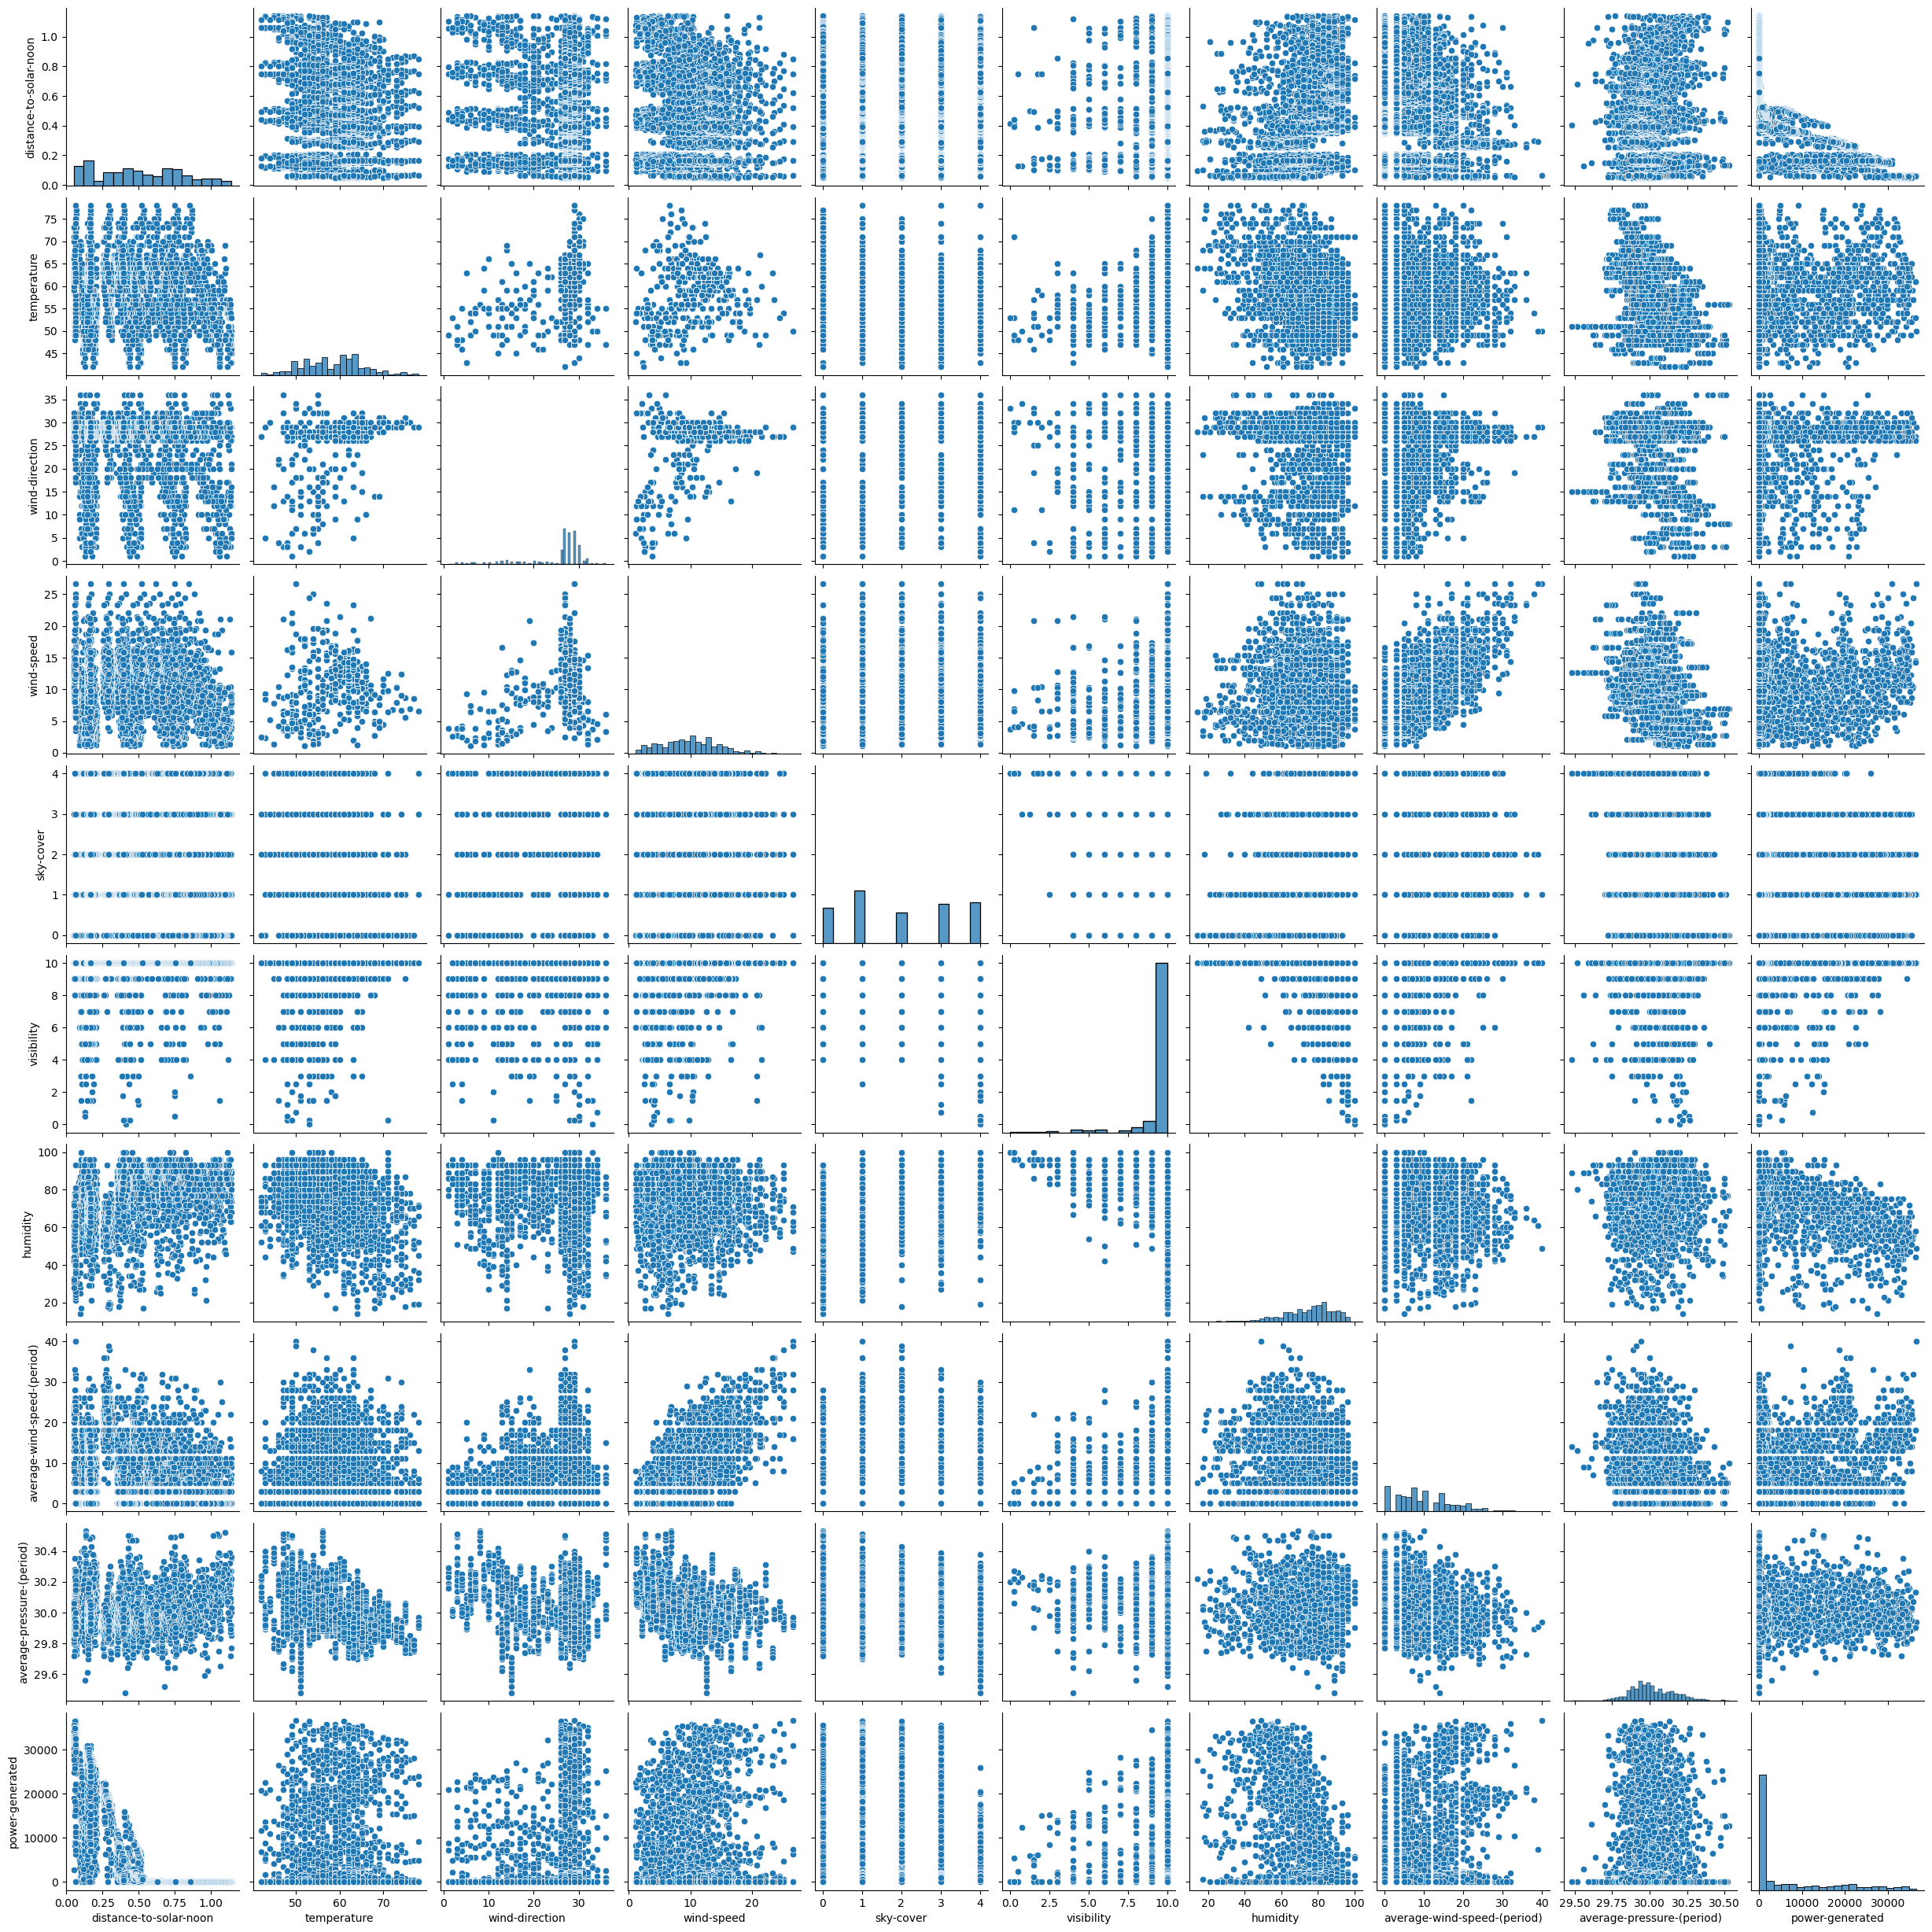

In [56]:
sns.pairplot(Data.iloc[:,0:10], dropna=True)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Drop rows with missing values

In [65]:
Data.dropna(inplace=True)

In [66]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2920 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [ ]:
# Spliting the Dataset

In [68]:
X = Data.drop('power-generated', axis=1)
y = Data['power-generated']

In [69]:
X

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87


In [71]:
y

0           0
1           0
2        5418
3       25477
4       30069
        ...  
2915     6995
2916    29490
2917    17257
2918      677
2919        0
Name: power-generated, Length: 2920, dtype: int64

In [ ]:
# Split the data into training and testing sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
2651,0.160000,65,27,13.6,1,10.0,68,14.0,29.88
1709,0.298292,54,27,25.1,2,10.0,64,38.0,29.89
869,0.511344,47,20,8.7,4,10.0,69,11.0,30.14
2355,0.148816,67,29,10.7,0,10.0,70,5.0,29.83
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93
...,...,...,...,...,...,...,...,...,...
1638,0.546685,52,27,10.7,2,10.0,80,22.0,30.17
1095,1.084602,56,13,3.2,0,10.0,59,3.0,30.15
1130,0.436455,55,13,1.5,1,10.0,86,0.0,30.15
1294,0.715856,48,29,16.2,1,10.0,68,21.0,30.04


In [74]:
y_train

2651    10750
1709    18575
869      3407
2355    29010
2915     6995
        ...  
1638      445
1095        0
1130      207
1294        0
860     22524
Name: power-generated, Length: 2336, dtype: int64

In [ ]:
#Standardizing the features

In [75]:
scaler = StandardScaler()

In [76]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train_scaled

array([[-1.14325278,  0.96537221,  0.30478885, ..., -0.38401522,
         0.53054567, -0.97544427],
       [-0.68232956, -0.64301813,  0.30478885, ..., -0.65237496,
         3.83622612, -0.90507033],
       [ 0.02776829, -1.66653926, -0.70003116, ..., -0.31692528,
         0.11733562,  0.85427818],
       ...,
       [-0.22183493, -0.49680083, -1.70485116, ...,  0.82360364,
        -1.39776792,  0.92465212],
       [ 0.70940146, -1.52032196,  0.59188028, ..., -0.38401522,
         1.49470247,  0.15053878],
       [-1.0134237 , -2.25140847,  0.59188028, ..., -1.99417369,
        -0.70908449, -0.41245275]])

In [78]:
X_test_scaled

array([[-0.8234681 ,  0.8191549 ,  0.59188028, ..., -0.98782464,
         1.49470247, -1.11619215],
       [-0.14434309,  0.5267203 ,  0.30478885, ..., -0.11565547,
         1.08149241, -0.34207881],
       [ 0.53293065,  1.25780681,  0.59188028, ..., -0.11565547,
         0.39280899, -1.89030549],
       ...,
       [-0.11786086,  0.8191549 ,  0.16124313, ..., -0.11565547,
         0.11733562, -0.48282669],
       [-0.21588416, -0.35058353, -1.70485116, ...,  0.62233383,
        -0.70908449,  0.92465212],
       [ 0.93305302,  0.5267203 ,  0.73542599, ...,  0.89069358,
         0.66828236,  0.7135303 ]])

In [ ]:
# Model Building

In [ ]:
# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression 

In [88]:
model1= LinearRegression()
model1.fit(X_train_scaled,y_train)

LinearRegression()

In [89]:
print("Coefficients:", model1.coef_)

Coefficients: [-6742.70399601  -527.14635922   282.45218556   -32.73055664
 -1296.86297886   271.46442197 -2275.05153045  1000.97315141
   207.39745403]


In [111]:
y_pred1 = model1.predict(X_test)


C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [112]:
y_pred1

array([-126268.05459841, -159822.88707805, -166850.56195647,
       -168840.93127391, -200738.55055205, -106569.77709574,
       -192779.62755448, -208330.26200158, -191533.45583656,
       -208661.50672607, -180607.48310011, -197695.91181594,
       -103673.46713298,  -94940.60721722, -124129.39664083,
       -222528.74051384, -197260.68684453, -207020.90576856,
       -162887.49636892, -188453.08741578, -144542.3695915 ,
       -227398.44134721, -140596.41115339, -210261.16885519,
       -145837.26737875, -202406.50367285,  -78212.41761789,
       -186522.90477262,  -59363.83098136, -117379.75205132,
       -110330.67911229, -111925.94742264, -167301.27929659,
       -224240.8476244 , -200760.15911266, -157741.96148925,
       -198925.95458518, -170468.88660865,  -88360.75461035,
       -221094.07195227, -126267.93469716, -191938.29458826,
       -111779.8506637 , -195897.32205292, -193872.9872391 ,
       -174417.26982552, -136842.01826395, -133079.58646276,
       -165867.03400415,

In [ ]:
# Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

LogisticRegression()

In [115]:
y_pred2 = model2.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [116]:
y_pred2

array([ 906,  907, 6642, 1309, 1309, 6642,  907,  907,  907,  907,  907,
        907,  906,  907, 1309,  907, 1309, 1309,  907,  907,  907,  907,
        907,  907,  907, 6342, 6642,  907,  906, 6642,  907,  906,  907,
        907,  907,  907,  907,  907, 6642, 1309,  906,  906, 6642, 6642,
       6642, 6642,  907, 1309,  907, 1309,  907, 6642,  907,  907,  907,
       1309,  907,  907,  907, 1309, 1334,  907, 1309,  907,  907,  907,
        907,  907,  907,  907, 1309, 6642,  906,  907, 6642, 1309,  907,
       6642, 1309,  907,  906, 6642,  907,  907, 6642, 1309,  907, 1309,
        907,  907, 1309, 1309,  907, 6642, 1309,  906, 6642, 1309, 6342,
       1309,  907,  907, 6642, 1309,  906,  907,  906, 1309, 1309, 6642,
        907, 6642,  907, 6642, 1309,  907,  907,  907, 1309, 6642, 1309,
        907, 6642,  906,  907, 6642,  907,  907, 1309,  907,  907, 6642,
       6642, 1309, 6642,  907,  906,  907, 1309, 6642,  907, 6342, 1309,
        907,  907,  324,  906, 6642, 1309,  907, 13

In [ ]:
# Decision Tree Regression

In [121]:
from sklearn.tree import DecisionTreeRegressor

In [124]:
model3= DecisionTreeRegressor(random_state=42)

model3.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=42)

In [125]:
y_pred3 = model3.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [126]:
y_pred3

array([ 43.,   0.,   0.,   0.,   0., 379.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 218.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 218.,   0., 379., 218.,
         0.,   0., 218.,   0.,   0., 379.,   0.,   0.,   0.,   0.,   0.,
         0., 379.,   0., 379., 218.,   0.,   0., 218., 218.,   0.,   0.,
         0.,   0., 379.,   0.,   0., 379., 379.,   0., 218., 379.,   0.,
         0.,   0., 379.,   0., 379.,  43.,  43.,   0.,   0., 379.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,
        30.,   0.,   0., 379.,   0.,   0.,   0.,  43.,   0.,   0.,   0.,
       379., 218., 379.,   0.,   0., 379.,   0.,   0.,   0., 218.,   0.,
         0.,   0., 379., 218., 218.,   0., 379.,   0., 379.,   0.,   0.,
       379.,   0.,   0.,   0.,   0., 379.,   0.,   0.,   0.,   0.,   0.,
         0., 218., 379., 379., 379.,   0.,   0.,   

In [ ]:
# Random Forest Regression

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
model4=  RandomForestRegressor(random_state=42)

model4.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [129]:
y_pred4 = model4.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [130]:
y_pred4

array([3.6230e+01, 3.3500e+00, 0.0000e+00, 1.1200e+00, 3.3500e+00,
       3.6558e+02, 0.0000e+00, 0.0000e+00, 4.8800e+00, 4.4700e+00,
       3.3500e+00, 0.0000e+00, 1.0710e+01, 8.4000e+00, 1.1200e+00,
       0.0000e+00, 0.0000e+00, 3.3500e+00, 3.3500e+00, 3.3500e+00,
       1.6846e+02, 0.0000e+00, 3.3500e+00, 3.3500e+00, 9.8500e+00,
       4.4700e+00, 1.9100e+00, 4.4700e+00, 9.8500e+00, 1.8980e+02,
       9.8500e+00, 5.7218e+02, 1.6708e+02, 3.3500e+00, 0.0000e+00,
       1.6881e+02, 0.0000e+00, 3.3500e+00, 3.9767e+02, 0.0000e+00,
       1.9100e+00, 3.0000e-01, 1.9100e+00, 0.0000e+00, 1.9100e+00,
       2.7641e+02, 3.3500e+00, 2.9261e+02, 1.8762e+02, 0.0000e+00,
       0.0000e+00, 1.8600e+02, 1.8453e+02, 0.0000e+00, 3.3500e+00,
       6.3000e-01, 3.3500e+00, 2.3292e+02, 0.0000e+00, 0.0000e+00,
       4.1085e+02, 2.5822e+02, 4.0000e-02, 1.6881e+02, 2.7496e+02,
       3.3500e+00, 3.3500e+00, 4.8800e+00, 5.9110e+02, 3.3500e+00,
       3.0578e+02, 3.6450e+01, 3.1380e+01, 1.0050e+01, 0.0000e

In [ ]:
# Ridge Regression

In [132]:
from sklearn.linear_model import Ridge

In [134]:
model5= Ridge(alpha = 5) 
model5.fit(X_train_scaled,y_train)

Ridge(alpha=5)

In [135]:
y_pred5 = model5.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [136]:
y_pred5

array([-126100.06821093, -159689.09402498, -166704.75397279,
       -168772.11378795, -200670.1895284 , -106350.05298973,
       -192752.69760878, -208281.83831931, -191409.56294401,
       -208586.29832934, -180534.15286463, -197582.34985076,
       -103439.59424228,  -94798.86655622, -124042.29833356,
       -222428.32755024, -197188.3042838 , -207009.58598297,
       -162784.86370248, -188379.53973472, -144433.56675828,
       -227305.93865212, -140485.86832645, -210219.44345312,
       -145710.10204431, -202284.43865965,  -77962.02746519,
       -186455.57260155,  -59053.74924855, -117205.3960566 ,
       -110174.93615776, -111739.36733752, -167210.30566543,
       -224217.37171829, -200668.33487247, -157650.01223102,
       -198891.86124084, -170382.9713848 ,  -88165.90454489,
       -221053.20294474, -126071.79265281, -191776.65842756,
       -111617.02758294, -195778.37989014, -193754.62417104,
       -174274.31863346, -136741.52148824, -133018.12942796,
       -165765.73625229,

In [ ]:
# Lasso Regression:

In [137]:
from sklearn.linear_model import Lasso

In [138]:
model6 = Lasso(alpha = 1)
model6.fit(X_train_scaled,y_train)

Lasso(alpha=1)

In [140]:
y_pred6=model6.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [141]:
y_pred6

array([-126276.19666587, -159817.81620772, -166844.49014652,
       -168854.57972337, -200716.61849192, -106557.31612466,
       -192813.88537344, -208318.0105165 , -191515.06162986,
       -208653.64301377, -180599.20696088, -197677.55696024,
       -103667.39375966,  -94965.322871  , -124142.93005631,
       -222506.69379086, -197245.44360273, -207045.63579805,
       -162894.45973224, -188464.25386582, -144561.04885682,
       -227366.7435757 , -140608.71711207, -210267.00017134,
       -145857.8746561 , -202361.31826687,  -78173.54178135,
       -186524.27517498,  -59357.02233044, -117341.46777578,
       -110332.4439986 , -111919.88300428, -167283.18565756,
       -224230.54944881, -200742.5099965 , -157737.54794977,
       -198946.36959233, -170475.28538637,  -88339.68387185,
       -221115.03148865, -126258.51032259, -191920.84306059,
       -111784.21035021, -195889.73502108, -193857.20539592,
       -174389.04255224, -136848.43958343, -133090.10241555,
       -165859.10366233,

In [ ]:
# GradientBoosting Regression

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
model7=GradientBoostingRegressor(random_state=42)
model7.fit(X_train_scaled,y_train)

GradientBoostingRegressor(random_state=42)

In [144]:
y_pred7=model7.predict(X_test)

C:\Users\Kabita Dikshit\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [145]:
y_pred7

array([-1275.22750169, -1275.22750169, -1218.01889835, -2892.07580118,
       -1275.22750169, -2344.10367437, -1275.22750169, -2715.8480396 ,
       -2715.8480396 , -2715.8480396 , -2715.8480396 , -2715.8480396 ,
       -1275.22750169, -1275.22750169, -2964.09704553, -2715.8480396 ,
       -2964.09704553, -2258.72492925, -2715.8480396 , -2715.8480396 ,
       -2715.8480396 , -2715.8480396 , -2715.8480396 , -2715.8480396 ,
       -1275.22750169, -1275.22750169, -1218.01889835, -2715.8480396 ,
       -2715.8480396 , -2715.8480396 , -2715.8480396 ,  -448.89069786,
       -2715.8480396 , -3388.58209087, -2715.8480396 , -2715.8480396 ,
       -2715.8480396 , -2715.8480396 ,  -747.20239174, -1218.01889835,
       -1218.01889835, -1275.22750169, -1218.01889835, -2715.8480396 ,
       -2201.51632591, -1161.18843139, -2715.8480396 , -2087.47725561,
       -2715.8480396 , -1275.22750169, -1275.22750169, -1343.87934074,
       -1306.11026501, -2715.8480396 , -1275.22750169, -1563.71521525,
      

In [ ]:
# XGB Regression

In [147]:
from xgboost import XGBRegressor

In [148]:
model8=XGBRegressor(random_state=42)
model8.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [149]:
y_pred8=model8.predict(X_test)

In [150]:
y_pred8

array([1924.3663 , 1912.4261 , 1966.6576 , 1198.4814 , 1912.4261 ,
       2503.0916 , 1811.9751 , 2222.7383 , 2354.828  , 2354.828  ,
       2361.0037 , 2260.553  , 1924.3663 , 1924.3663 , 1478.7517 ,
       2261.784  , 1429.2806 ,  642.58234, 2361.0037 , 2354.828  ,
       2372.944  , 2261.784  , 2372.944  , 2319.6384 , 1924.3663 ,
       1906.2506 , 1952.8888 , 2354.828  , 2372.944  , 2360.368  ,
       2372.944  , 3287.253  , 2372.944  , 2657.9578 , 2222.7383 ,
       2360.368  , 2222.7383 , 2372.944  , 3287.253  , 1864.6768 ,
       1952.8888 , 1811.9751 , 1964.8289 , 2260.553  ,  683.0451 ,
       2167.9238 , 2361.0037 ,  623.31915, 2360.368  , 1774.1606 ,
       1774.1606 , 1911.7904 , 1911.7904 , 2272.7917 , 1912.4261 ,
        956.29987, 2372.944  , 2616.5017 , 2261.784  ,  735.1155 ,
       3246.7903 , 2616.5017 ,  990.7093 , 2372.944  , 2616.5017 ,
       2354.828  , 2372.944  , 1906.2506 , 3246.7903 , 2372.944  ,
       2503.0916 , 2372.944  , 1964.8289 , 2354.828  , 1163.29

In [ ]:
# Model Evaluation

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Linear Regression

In [160]:
mse = mean_squared_error(y_test, y_pred1)
mse

32291235872.944416

In [161]:
mae = mean_absolute_error(y_test, y_pred1)
mae

176282.3012219394

In [162]:
r2 = r2_score(y_test, y_pred1)
r2

-305.5513715275393

In [164]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model Performance:')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R²: {r2:.4f}')
    return mse, mae, r2

In [165]:
print("Linear Regression:")
evaluate_model(model1, X_test_scaled, y_test)


Linear Regression:
Model Performance:
MSE: 39494935.3044
MAE: 4981.1543
R²: 0.6251


(39494935.30444529, 4981.154255786568, 0.62506152958632)